In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [22]:
import yfinance as yf
import pandas as pd
from IPython.display import display

# Step 1: Download Apple stock data with 'Adj Close'
start = '2014-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end, auto_adjust=False)  # Important: auto_adjust=False

# Display raw (uncleaned) data
print("Raw (Uncleaned) Data:")
display(df.head())

[*********************100%***********************]  1 of 1 completed

Raw (Uncleaned) Data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-01-02,17.215376,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03,16.837217,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06,16.929035,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07,16.807962,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08,16.914408,19.409286,19.484285,19.238930,19.243214,258529600


In [7]:
# Flatten the column names (even if not multi-index, this will standardize the column names)
df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Display after flattening
print("After flattening the columns:")
display(df.head())

After flattening the columns:


,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
Date,,,,,,
2014-01-02,17.215376,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03,16.837217,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06,16.929035,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07,16.807962,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08,16.914408,19.409286,19.484285,19.238930,19.243214,258529600


In [9]:
# Reset the index (move 'Date' from index to normal column)
df_reset = df.reset_index()

# Display after resetting index
print("After resetting the index:")
display(df_reset.head())

After resetting the index:


,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
0,2014-01-02,17.215376,19.754642,19.893929,19.715000,19.845715,234684800
1,2014-01-03,16.837217,19.320715,19.775000,19.301071,19.745001,392467600
2,2014-01-06,16.929035,19.426071,19.528570,19.057142,19.194643,412610800
3,2014-01-07,16.807962,19.287144,19.498571,19.211430,19.440001,317209200
4,2014-01-08,16.914408,19.409286,19.484285,19.238930,19.243214,258529600


In [15]:
# Removing unnecessary columns (e.g., 'Adj Close' but keeping 'Volume')
df_cleaned = df_reset.drop(columns=['Adj Close AAPL'])

# Display cleaned data (after removing 'Adj Close')
print("Cleaned Data (after removing 'Adj Close AAPL' column):")
display(df_cleaned.head())

Cleaned Data (after removing 'Adj Close AAPL' column):


,Date,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
0,2014-01-02,19.754642,19.893929,19.715000,19.845715,234684800
1,2014-01-03,19.320715,19.775000,19.301071,19.745001,392467600
2,2014-01-06,19.426071,19.528570,19.057142,19.194643,412610800
3,2014-01-07,19.287144,19.498571,19.211430,19.440001,317209200
4,2014-01-08,19.409286,19.484285,19.238930,19.243214,258529600


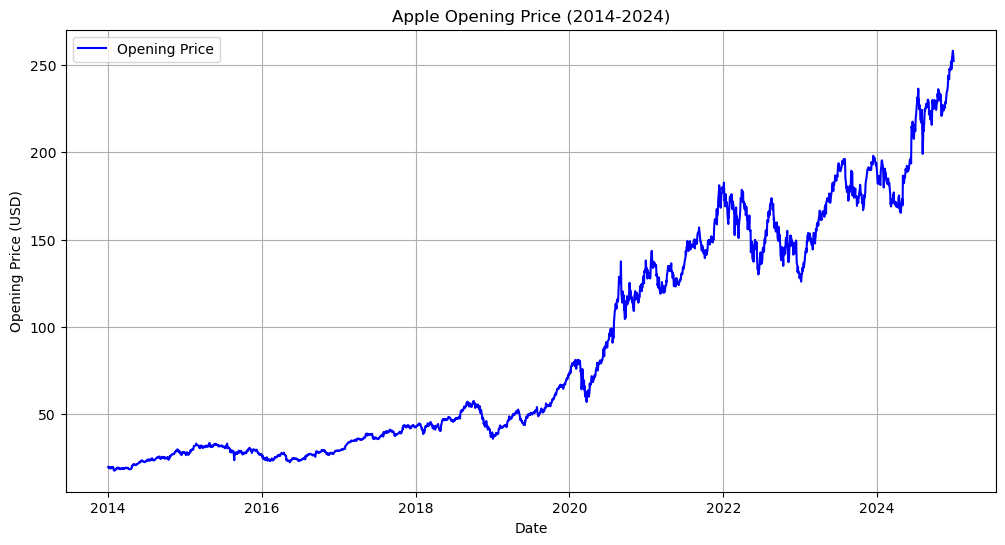

In [17]:
# Plot the Opening Price from the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.title('Apple Opening Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

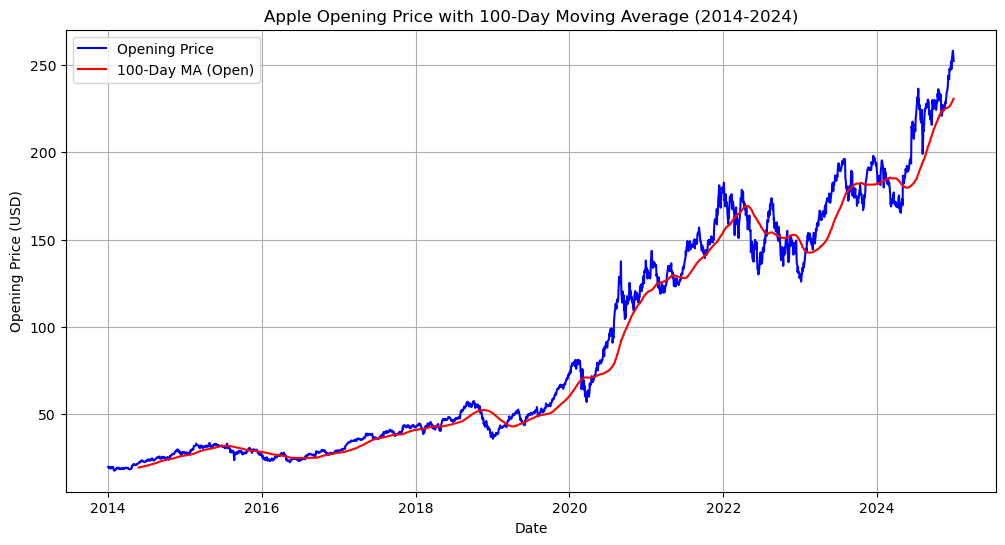

In [26]:
# Calculate 100-day Moving Average of Opening Price
ma100_open = df_cleaned['Open AAPL'].rolling(window=100).mean()

# Plotting the Opening Price and 100-day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.plot(df_cleaned['Date'], ma100_open, label='100-Day MA (Open)', color='red')  # Moving average in red
plt.title('Apple Opening Price with 100-Day Moving Average (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

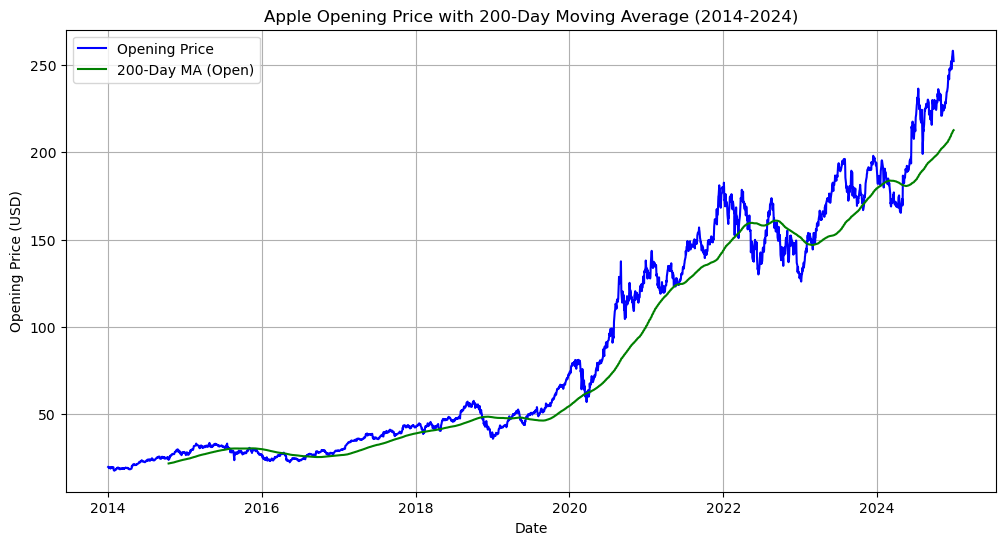

In [40]:
# Calculate 200-Day Moving Average of Opening Price
ma200_open = df_cleaned['Open AAPL'].rolling(window=200).mean()

# Plotting the Opening Price with 200-Day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.plot(df_cleaned['Date'], ma200_open, label='200-Day MA (Open)', color='green')  # Moving average in green
plt.title('Apple Opening Price with 200-Day Moving Average (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

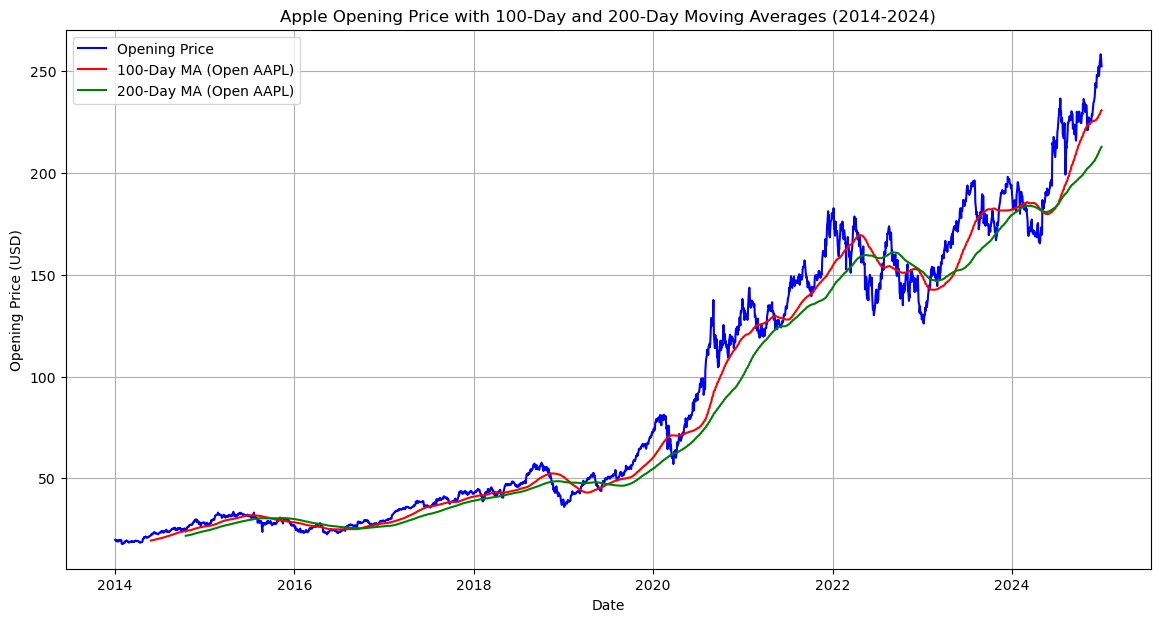

In [36]:
# Calculate 100-day and 200-day Moving Averages of Opening Price
ma100_open = df_cleaned['Open AAPL'].rolling(window=100).mean()
ma200_open = df_cleaned['Open AAPL'].rolling(window=200).mean()

# Plotting the Opening Price with both Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.plot(df_cleaned['Date'], ma100_open, label='100-Day MA (Open AAPL)', color='red')
plt.plot(df_cleaned['Date'], ma200_open, label='200-Day MA (Open AAPL)', color='green')
plt.title('Apple Opening Price with 100-Day and 200-Day Moving Averages (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


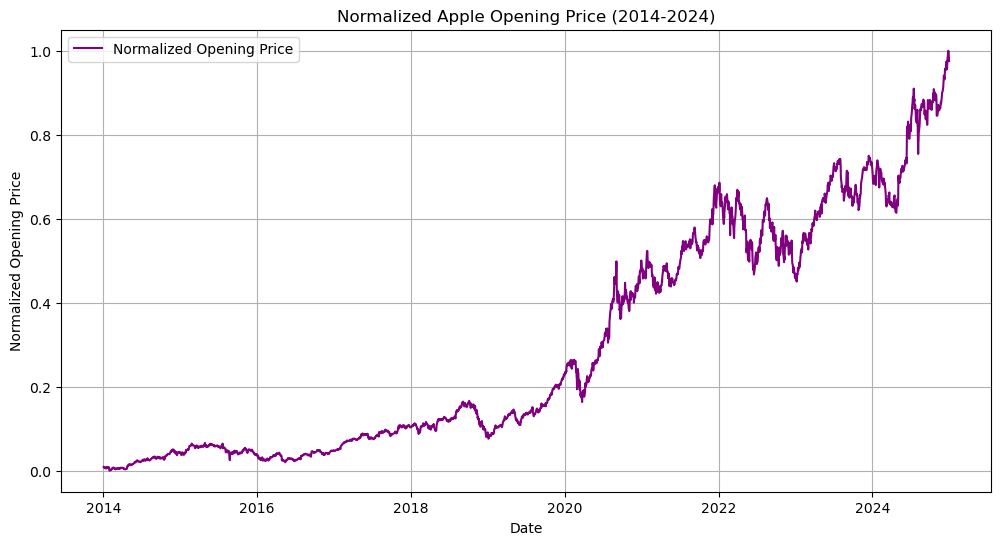

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the Opening Price (scaling to [0, 1])
df_cleaned['Open_Normalized'] = scaler.fit_transform(df_cleaned[['Open AAPL']])

# Plotting the normalized Opening Price
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open_Normalized'], label='Normalized Opening Price', color='purple')
plt.title('Normalized Apple Opening Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Opening Price')
plt.legend()
plt.grid(True)
plt.show()